<h2 style="text-align: center; color: blue;">
    Small Image Classification Using Convolutional Neural Network (CNN)
</h2>


<p style="text-align: center,color:black;">In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification </p>

![](small_images.jpg)


In [3]:
import tensorflow as tf
from  tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train) ,(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 66s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [17]:
y_train.shape


(50000, 1)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
y_train= y_train.reshape(-1,)

In [23]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [26]:
def plot_img(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])    


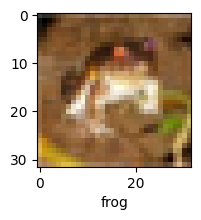

In [28]:
plot_img(X_train,y_train,0)

In [31]:
X_train = X_train/255
X_test = X_test/255

In [34]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(10, activation='sigmoid')
    
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
           )
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 82ms/step - accuracy: 0.3154 - loss: 1.9185
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4240 - loss: 1.6343
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4605 - loss: 1.5427
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4809 - loss: 1.4751
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4972 - loss: 1.4321


In [35]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4877 - loss: 1.5010


[1.5078938007354736, 0.47870001196861267]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report:\n' ,classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.62      0.49      1000
           1       0.53      0.64      0.58      1000
           2       0.49      0.21      0.30      1000
           3       0.45      0.21      0.28      1000
           4       0.45      0.40      0.42      1000
           5       0.46      0.28      0.34      1000
           6       0.56      0.49      0.53      1000
           7       0.48      0.60      0.53      1000
           8       0.50      0.71      0.59      1000
           9       0.47      0.64      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.46     10000
weighted avg       0.48      0.48      0.46     10000



In [50]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
    
])


In [51]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
           )


In [52]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3756 - loss: 1.7062
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5925 - loss: 1.1630
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6487 - loss: 1.0057
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6817 - loss: 0.9193
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7074 - loss: 0.8512
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7278 - loss: 0.7830
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7423 - loss: 0.7446
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7629 - loss: 0.6890
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7739 - loss: 0.6438
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7833 - loss: 0.6157


In [53]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6832 - loss: 0.9632


[0.966300904750824, 0.6802999973297119]

In [56]:
y_test =y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

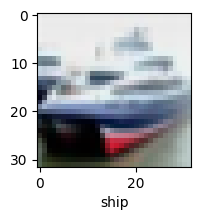

In [57]:
plot_img(X_test,y_test,1)

In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[1.3658107e-02, 2.0644737e-05, 1.1975088e-03, 7.2674680e-01,
        1.8281338e-04, 1.8736634e-01, 5.2572009e-03, 5.4163830e-03,
        6.0017917e-02, 1.3619721e-04],
       [1.4121941e-04, 9.7979442e-04, 2.2439932e-07, 4.2381398e-08,
        1.7503866e-10, 4.1331977e-10, 1.2258776e-09, 2.9490896e-10,
        9.9887580e-01, 2.8378004e-06],
       [2.3139996e-02, 3.3800334e-02, 1.2087320e-03, 5.2813844e-05,
        2.6029908e-05, 7.5661819e-06, 3.1175787e-06, 2.4463554e-04,
        9.3368036e-01, 7.8363931e-03],
       [9.1107261e-01, 2.5601091e-03, 4.5588851e-02, 4.2975442e-03,
        2.3711998e-02, 8.0199643e-06, 3.2297594e-05, 4.4990247e-03,
        7.3850281e-03, 8.4454921e-04],
       [1.2064550e-05, 2.9907800e-04, 3.6400422e-02, 2.2516647e-01,
        2.6121172e-01, 3.5731371e-02, 4.4105640e-01, 2.2290445e-05,
        9.5857453e-05, 4.2916513e-06]], dtype=float32)

In [59]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [60]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [62]:
print('CLassification_report: \n', classification_report(y_test,y_classes))

CLassification_report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.80      0.82      0.81      1000
           2       0.55      0.65      0.59      1000
           3       0.46      0.59      0.52      1000
           4       0.75      0.43      0.55      1000
           5       0.63      0.53      0.57      1000
           6       0.82      0.72      0.77      1000
           7       0.69      0.79      0.74      1000
           8       0.72      0.83      0.77      1000
           9       0.85      0.70      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [63]:
classes[y_classes[1]]

'ship'